In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, chisquare



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("MTBLS92.csv")

In [4]:
df

,Id,sampleID,class,menopause,bMI,eR,grade,Her2,Nstage,Tstage,...,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138
0,1,A_1,0.0,2,35.0,1,2.0,0,0,3,...,9.963454,3.976321,6.033208,20.737836,39.518648,4.372182,15.099900,15.520762,29.760339,2.890181
1,2,A_2,0.0,2,23.0,0,2.0,0,1,2,...,12.106535,5.006672,7.112918,17.030243,14.513175,2.961922,16.137018,13.461109,11.717635,1.213627
2,3,A_3,0.0,2,28.0,1,2.0,0,2,5,...,12.406024,5.279220,3.238246,23.586563,13.248736,4.775705,16.418746,18.986196,25.661178,1.724701
3,4,A_4,0.0,2,33.0,1,1.0,0,1,2,...,6.644769,4.359540,2.003790,14.733730,6.092037,2.101370,10.146233,8.364284,13.960879,0.816202
4,5,A_5,0.0,2,33.0,1,2.0,0,1,2,...,6.066591,4.565057,3.456530,15.371234,6.091531,1.318297,7.047676,6.197168,6.994256,0.754510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,443,B_3522,NaN,1,23.0,1,3.0,0,0,2,...,4.947312,7.861192,7.422352,35.108122,14.050911,1.960551,9.691469,41.442358,18.335443,1.387309
443,444,B_3527,NaN,2,27.0,1,2.0,0,1,4,...,5.204554,3.667036,5.511829,23.890982,8.236483,1.291081,7.732709,24.248787,11.408903,1.124086
444,445,B_3556,NaN,2,21.0,1,2.0,0,1,4,...,6.202146,3.237032,5.888704,17.596822,10.754855,1.146095,4.250032,11.117008,5.760919,0.737627
445,446,B_3592,NaN,2,25.0,1,3.0,0,0,2,...,4.200426,4.687098,1.180826,28.476610,14.516303,5.826483,6.001031,24.548049,24.579317,0.969572


In [5]:
#checking dimensions of df
df.shape

(447, 151)

In [6]:
#drop_col_df = df.copy()
#for col in drop_col_df.columns:
    #missing = drop_col_df[col].isna().sum()
    #if missing > 0.2 * len(drop_col_df):
       # drop_col_df.drop(labels=[col], axis=1, inplace=True)


In [7]:
print(df.shape)
#print(drop_col_df.shape)

(447, 151)


In [8]:
#drop_row_df = df.copy() 
#sum_missing = drop_row_df.isnull().sum(axis=1).tolist()
#for row in range(len(sum_missing)):
    #if sum_missing[row] > 0.2 * len(drop_row_df.columns):
           #drop_row_df.drop(labels=[row], axis=0, inplace=True)

In [9]:
df.drop(["sampleID","class","eR","grade","Her2","timepoint","series"], axis = 1, inplace = True)

In [10]:
df.dropna(inplace= True)

In [11]:
df.describe()

,Id,menopause,bMI,Nstage,Tstage,M1,M2,M3,M4,M5,...,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,232.886567,1.465672,26.053731,0.638806,2.417910,1.116059,25.528581,1.433929,1.079501,2.091714,...,6.183866,4.424493,4.227506,24.066316,11.222020,2.451113,7.323211,14.857247,12.160336,0.977854
std,147.017410,0.499566,4.620649,0.655003,0.898256,0.296947,22.502690,0.757531,0.479079,1.046436,...,3.484543,1.615322,4.789479,15.796432,8.810723,2.304486,5.238741,9.521469,10.449087,0.578325
min,1.000000,1.000000,18.000000,0.000000,1.000000,0.473549,4.931476,0.314188,0.246877,0.586113,...,1.401772,1.081789,0.029105,2.970507,1.276239,0.201260,0.803099,2.457827,0.454010,0.182633
25%,84.500000,1.000000,23.000000,0.000000,2.000000,0.842878,6.231355,0.922555,0.766517,1.454451,...,3.850728,3.301419,1.479284,12.033864,4.989731,1.019261,3.825773,7.763314,5.409489,0.581269
50%,280.000000,1.000000,25.000000,1.000000,2.000000,1.185181,8.356851,1.248474,0.970528,1.823984,...,5.389345,4.227928,2.642767,20.223697,8.805088,1.885343,5.733032,12.212575,9.447328,0.848236
75%,363.500000,2.000000,29.000000,1.000000,3.000000,1.344040,50.418992,1.755051,1.285302,2.458543,...,7.603637,5.233631,4.806146,31.630827,14.140027,2.992256,9.473108,19.442410,15.593191,1.216862
max,447.000000,2.000000,44.000000,3.000000,5.000000,1.908254,67.652271,5.550324,4.693959,10.365979,...,27.263676,10.647111,34.753189,83.338479,70.397324,18.224465,35.389223,58.347064,98.264030,4.364199


In [12]:
 df['chemoResponse'] = df['chemoResponse'].replace(["pCR", "no pCR"], [0,1]).astype(int)

In [13]:
df['chemoResponse'].dtype

dtype('int32')

Text(0, 0.5, 'Number of people')

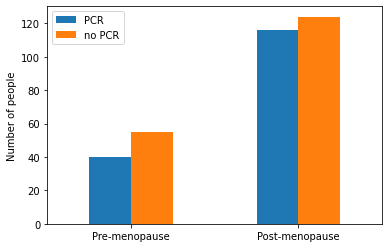

In [14]:
menopause_chemo = len(df[df["menopause"] == 2][df["chemoResponse"] == 0])
menopause_nochemo = len(df[df["menopause"] == 2][df["chemoResponse"] == 1])

nomenopause_chemo = len(df[df["menopause"] == 1][df["chemoResponse"] == 0])
nomenopause_nochemo = len(df[df["menopause"] == 1][df["chemoResponse"] == 1])

groups = [
    [menopause_chemo, menopause_nochemo], 
    [nomenopause_chemo, nomenopause_nochemo]
]

group_labels = ['PCR', 'no PCR']
xticks = ['Pre-menopause', 'Post-menopause']

# Convert data to pandas DataFrame.
df_new = pd.DataFrame(groups, index=group_labels).T

# Plot.
ax = df_new.plot.bar()
ax.set_xticklabels(xticks, rotation=0)
ax.set_ylabel('Number of people')

In [15]:
df.shape

(335, 144)

(<Figure size 432x288 with 3 Axes>,
 {('2', '1'): (0.0, 0.0, 0.4633548674537758, 0.7411193457705085),
  ('2', '0'): (0.0,
   0.7444416049067211,
   0.4633548674537758,
   0.25555839509327877),
  ('1', '1'): (0.4683299918318853, 0.0, 0.5316700081681147, 0.690435976911227),
  ('1', '0'): (0.4683299918318853,
   0.6937582360474396,
   0.5316700081681147,
   0.3062417639525603)})

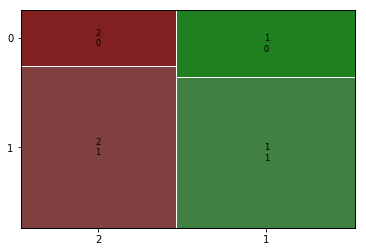

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['menopause', 'chemoResponse'])

In [17]:
men_table=pd.crosstab(index=df['menopause'],columns="count")
chem_table=pd.crosstab(index=df['chemoResponse'],columns="count")
print(men_table)
print(chem_table)

col_0      count
menopause       
1            179
2            156
col_0          count
chemoResponse       
0                 95
1                240


In [18]:
myField1 = df['menopause']
myField2 = df['chemoResponse']

In [19]:
fieLd = pd.DataFrame({"men": myField1, "chemresp": myField2})

In [20]:
myCrosstable = pd.crosstab(myField1, myField2, margins=True)
myCrosstable.columns =  ['resp0', 'resp1','row_totals']
myCrosstable.index = ['men1', 'men2','col_totals']
observed = myCrosstable.iloc[0:2,0:2]
myCrosstable

,resp0,resp1,row_totals
men1,55,124,179
men2,40,116,156
col_totals,95,240,335


In [21]:
expected = np.outer(myCrosstable['row_totals'][0:2],
                   myCrosstable.loc['col_totals'][0:2])/335
expected = pd.DataFrame(expected)

expected.cols = ['resp0', 'resp1']
expected.ind = ['men1', 'men2']
expected

,0,1
0,50.761194,128.238806
1,44.238806,111.761194


In [22]:
table = np.array([[55,124],
                 [40,116]])
chi2,p,dof,expected=chi2_contingency(table)
print(f"chi2 statistic:   {chi2:.5g}")
print(f"p_value:   {p:.5g}")
print(f"degrees of freedom:   {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:   0.82544
p_value:   0.36359
degrees of freedom:   1
expected frequencies:
[[ 50.76119403 128.23880597]
 [ 44.23880597 111.76119403]]


In [23]:
#Checking stages alongside chemoresponse
myStageT = df['Tstage']
myStageT1 = df['chemoResponse']
fieLd = pd.DataFrame({"men": myStageT, "stageT": myStageT1 })

In [24]:
myCrossTable = pd.crosstab(myStageT, myStageT1, margins=True)
myCrossTable.columns =  ['pCR', 'no pCR','row_totals']
myCrossTable.index = ['stage1', 'stage2','stage3','stage4','stage5','col_totals']
observedT = myCrossTable.iloc[0:5,0:2]
myCrossTable

,pCR,no pCR,row_totals
stage1,4,9,13
stage2,73,157,230
stage3,11,40,51
stage4,1,20,21
stage5,6,14,20
col_totals,95,240,335


In [25]:
expectedT = np.outer(myCrossTable['row_totals'][0:5],
                   myCrossTable.loc['col_totals'][0:2])/335
expectedT = pd.DataFrame(expectedT)

expectedT.columns =  ['pCR', 'no pCR']
expectedT.index = ['stage1', 'stage2','stage3','stage4','stage5']
expectedT

,pCR,no pCR
stage1,3.686567,9.313433
stage2,65.223881,164.776119
stage3,14.462687,36.537313
stage4,5.955224,15.044776
stage5,5.671642,14.328358


In [26]:
table2 = np.array([[4,9],
                 [73,157],
                 [11,40],
                 [1,20],
                 [6,14]])
chi2,p,dof,expectedT=chi2_contingency(table2)
print(f"chi2 statistic:   {chi2:.5g}")
print(f"p_value:   {p:.5g}")
print(f"degrees of freedom:   {dof}")
print("expected frequencies:")
print(expectedT)

chi2 statistic:   8.2702
p_value:   0.082167
degrees of freedom:   4
expected frequencies:
[[  3.68656716   9.31343284]
 [ 65.2238806  164.7761194 ]
 [ 14.46268657  36.53731343]
 [  5.95522388  15.04477612]
 [  5.67164179  14.32835821]]


In [27]:
myStageN = df['Nstage']
myStageN1 = df['chemoResponse']
fieLd = pd.DataFrame({"men": myStageN, "stageN": myStageN1 })

In [28]:
myCrossTabLe = pd.crosstab(myStageN, myStageN1, margins=True)
myCrossTabLe.columns =  ['pCR', 'no pCR','row_totals']
myCrossTabLe.index = ['stage0', 'stage1','stage2','stage3','col_totals']
observed = myCrossTabLe.iloc[0:4,0:2]
myCrossTabLe

,pCR,no pCR,row_totals
stage0,39,109,148
stage1,55,111,166
stage2,1,14,15
stage3,0,6,6
col_totals,95,240,335


In [29]:
expectedN = np.outer(myCrossTabLe['row_totals'][0:4],
                   myCrossTabLe.loc['col_totals'][0:2])/335
expectedN = pd.DataFrame(expectedN)

expectedN.columns =  ['pCR', 'no pCR']
expectedN.index = ['stage0', 'stage1','stage2','stage3']
expectedN

,pCR,no pCR
stage0,41.970149,106.029851
stage1,47.074627,118.925373
stage2,4.253731,10.746269
stage3,1.701493,4.298507


In [30]:
table3 = np.array([[39,109],
                 [55,111],
                 [1,14],
                 [0,6]])
chi2,p,dof,expectedN=chi2_contingency(table3)
print(f"chi2 statistic:   {chi2:.5g}")
print(f"p_value:   {p:.5g}")
print(f"degrees of freedom:   {dof}")
print("expected frequencies:")
print(expectedN)

chi2 statistic:   8.0048
p_value:   0.045912
degrees of freedom:   3
expected frequencies:
[[ 41.97014925 106.02985075]
 [ 47.07462687 118.92537313]
 [  4.25373134  10.74626866]
 [  1.70149254   4.29850746]]


In [31]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [32]:
data= pd.read_csv("MetChemoall.csv")
from tqdm import tqdm
from typing import List
from scipy import stats

In [33]:
data

,met_labels,Label,Pvalues
0,M1,Cer(d18:1/17:0),0.741534
1,M2,Cer(d18:1/22:6),0.817416
2,M3,LysoPC(14:0),0.675859
3,M4,LysoPC(16:0e),0.218832
4,M5,LysoPC(16:1),0.286469
...,...,...,...
133,M93,TG(16:0/18:0/18:1),0.006147
134,M92,TG(16:0/18:0/18:0),0.025411
135,M91,TG(16:0/16:0/18:0),0.017083
136,M89,TG(14:0/16:0/18:1),0.037111


In [34]:
def multiple_comparisons(
        data: pd.DataFrame,
        label: str = 'Pvalues') -> List[float]:
    """Run multiple t tests."""
    p_values = []
    for c in tqdm(data.columns):
        if c.startswith('Pvalues'):
            continue
        group_a = data[data[c] == 0][label]
        group_b = data[data[c] == 1][label]

        _, p = stats.ttest_ind(group_a, group_b, equal_var=True)
        p_values.append((c, p))

    return p_values

p_values = multiple_comparisons(data)

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1011.16it/s]


In [35]:
p_values.sort(key=lambda x: x[1])

for i, x in enumerate(p_values):
    if x[1] >= (i + 1) / len(p_values) * 0.05:
        break
significant = p_values[:i]

In [36]:
p_values

[('met_labels', nan), ('Label', nan)]

In [37]:
import numpy as np

def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(data['Pvalues'])
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]


In [38]:
a = p_adjust_bh(p)
a

array([0.86766359, 0.87306655, 0.86766359, 0.59213365, 0.6610453 ,
       0.74168889, 0.86766359, 0.86766359, 0.86766359, 0.86766359,
       0.86766359, 0.89199408, 0.98648488, 0.86766359, 0.86766359,
       0.74168889, 0.72190684, 0.86766359, 0.86766359, 0.86766359,
       0.86766359, 0.86766359, 0.86766359, 0.86766359, 0.86766359,
       0.65757   , 0.68117895, 0.86766359, 0.86766359, 0.86766359,
       0.58274088, 0.86766359, 0.56230889, 0.67592852, 0.86766359,
       0.6610453 , 0.86766359, 0.78403358, 0.86766359, 0.86766359,
       0.65757   , 0.49438653, 0.31707057, 0.86766359, 0.86766359,
       0.99769   , 0.58274088, 0.70555218, 0.86766359, 0.86766359,
       0.70555218, 0.70161788, 0.86766359, 0.86766359, 0.87306655,
       0.68117895, 0.86766359, 0.86766359, 0.86766359, 0.86766359,
       0.86766359, 0.86766359, 0.86766359, 0.79085721, 0.89255682,
       0.86766359, 0.99390018, 0.86766359, 0.86766359, 0.27337225,
       0.87306655, 0.66026225, 0.86766359, 0.86766359, 0.74168

In [39]:
a.shape

(138,)

In [40]:
data.shape

(138, 3)

In [48]:
dat= pd.read_csv("MenMetall.csv")
dat

,Label,met_labels,Pvalues
0,LysoPE(18:1),M13,0.0495974
1,PC(32:5),M20,0.00920953
2,PC(34:3e)|PE(37:3e),M27,0.00014564
3,PC(36:1),M31,0.023229
4,PC(36:4),M35,0.0172351
...,...,...,...
133,LysoPC(16:1),M5,0.916692
134,LysoPC(16:0e),M4,0.434458
135,LysoPC(14:0),M3,0.500099
136,Cer(d18:1/22:6),M2,0.325719


In [51]:

def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(dat['Pvalues'])
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]


In [52]:
p_adjust_bh(p)


ValueError: could not convert string to float: '8.34159*10^-7'